In [1]:
%pip install matplotlib
%pip install numpy==1.23.5
%pip install opencv-python
%pip install medpy==0.4.0
%pip install tqdm
%matplotlib inline
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import sys
import os
plt.rcParams["figure.figsize"] = (15,15)

print(f"numpy version : {np.__version__}")

%load_ext autoreload
%autoreload 2

numpy version : 1.23.5


In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
# from keras_unet.losses import dice_loss
# from keras_unet.metrics import dice_coef, iou, iou_thresholded
from keras_unet.visualization import plot_overlay_segmentation
from keras_unet.visualization import plot_compare_segmentation
from keras_unet.visualization import visualize_BestWorstOnes

# Add our own python modules stored in the folders present at the root level of this project
if "../" in sys.path: 
    print(sys.path)
else: 
    sys.path.append("../")
    print(sys.path)

if "model" in locals(): 
    print("deleting model")
    del model    
    
# Select the CPU device to run on
num_CPU = 1
num_cores = 8
tf.config.threading.set_intra_op_parallelism_threads(num_CPU)
tf.config.threading.set_inter_op_parallelism_threads(num_cores)
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3" 

['c:\\Users\\user\\Desktop\\zhuyi\\PTI\\camus-hands-on-main', 'c:\\Users\\user\\anaconda3\\envs\\py310\\python310.zip', 'c:\\Users\\user\\anaconda3\\envs\\py310\\DLLs', 'c:\\Users\\user\\anaconda3\\envs\\py310\\lib', 'c:\\Users\\user\\anaconda3\\envs\\py310', '', 'c:\\Users\\user\\anaconda3\\envs\\py310\\lib\\site-packages', 'c:\\Users\\user\\anaconda3\\envs\\py310\\lib\\site-packages\\win32', 'c:\\Users\\user\\anaconda3\\envs\\py310\\lib\\site-packages\\win32\\lib', 'c:\\Users\\user\\anaconda3\\envs\\py310\\lib\\site-packages\\Pythonwin', '../']


## <span style="color:brown"> 1.1) Load data

In [4]:
from keras_unet.utils import load_CAMUS_dataset

# Parameters
IMG_SIZE = 256  # All the images will be resized to IMG_SIZE x IMG_SIZE to speed up the process. 

dataset_train_path = "dataset/segmentation/train/"
dataset_valid_path = "dataset/segmentation/valid/"
dataset_test_path = "dataset/segmentation/test/"

# Load data
[X_train_C, y_train_C] = load_CAMUS_dataset(dataset_train_path, IMG_SIZE)
[X_valid_C, y_valid_C] = load_CAMUS_dataset(dataset_valid_path, IMG_SIZE)
[X_test_C, y_test_C] = load_CAMUS_dataset(dataset_test_path, IMG_SIZE)

# Deleting the last dimension's index=1
y_train_C = np.delete(y_train_C, 1, axis=3)
print(y_train_C.shape)

y_valid_C = np.delete(y_valid_C, 1, axis=3)
print(y_valid_C.shape)

y_test_C = np.delete(y_test_C, 1, axis=3)
print(y_test_C.shape)

from keras_unet.utils import load_SUMAC_dataset
dataset_dir = "./dataset/sumac_256/"
X_S, y_S = load_SUMAC_dataset(dataset_dir, img_size=256, 
                          extension="nii.gz",random_state=42)

from sklearn.model_selection import train_test_split
import numpy as np

# 假设 X_S 和 y_S 是原始的特征集和标签集
# 首先创建一个包含400个样本的初始训练集
X_train_S800, X_temp, y_train_S800, y_temp = train_test_split(X_S, y_S, test_size=0.2, random_state=42)
X_test_S, X_valid_S, y_test_S, y_valid_S = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 定义不同大小的训练集，包括400
sizes = [800, 700, 600, 500, 400, 300, 200, 100, 1]

from sklearn.utils import shuffle

X_valid = np.concatenate([X_valid_C, X_valid_S], axis=0)
y_valid = np.concatenate([y_valid_C, y_valid_S], axis=0)

X_valid, y_valid = shuffle(X_valid, y_valid, random_state=42)

100%|██████████| 100/100 [00:00<00:00, 1933.99it/s]


(800, 256, 256, 3)
(100, 256, 256, 3)
(100, 256, 256, 3)


100%|██████████| 1000/1000 [00:03<00:00, 316.39it/s]


## Load a trained model

In [5]:
from tensorflow.keras import models
from keras_unet.losses import dice_loss
from keras_unet.metrics import dice_coef

# model_path = './trained_model/BestModelRandom/Unet_size1.h5'
# model = models.load_model(model_path, 
#               custom_objects={'dice_coef': dice_coef, 'dice_loss': dice_loss})    


# Prediction

100/100 [==============================] - 1s 8ms/step


100%|██████████| 100/100 [00:02<00:00, 41.39it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.92,6.92,1.76
Myocardium,0.94,5.15,1.77
Left Ventricle,0.90,6.84,1.74


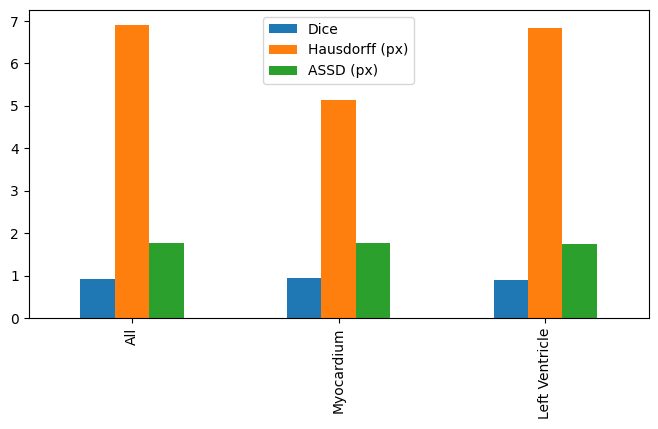

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 38.54it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,9.10,2.25
Myocardium,0.88,8.79,2.27
Left Ventricle,0.94,7.70,2.22


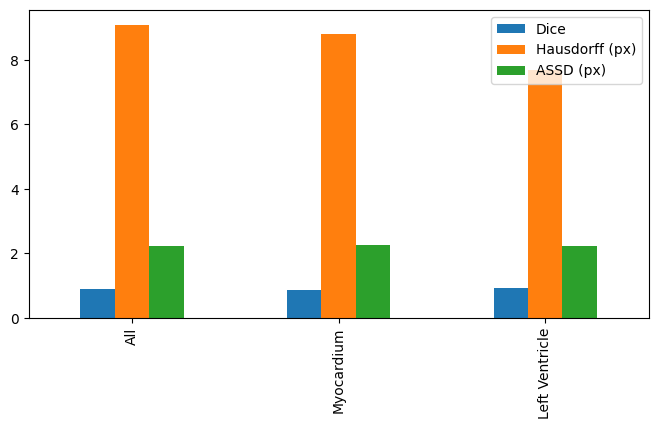

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 42.06it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,7.94,2.00
Myocardium,0.93,5.86,2.02
Left Ventricle,0.89,7.76,1.97


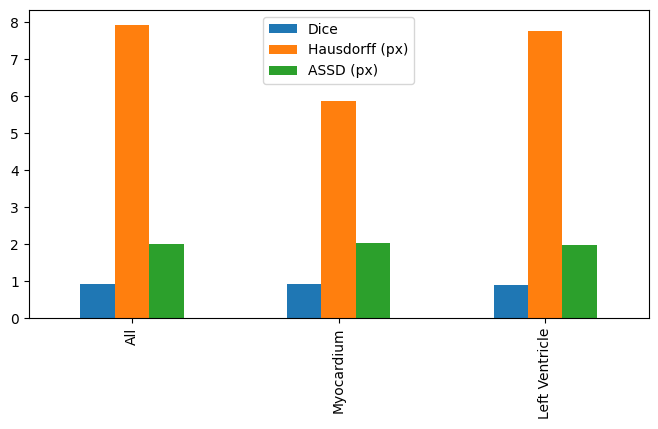

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 36.97it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,9.16,2.30
Myocardium,0.88,8.94,2.29
Left Ventricle,0.93,7.60,2.31


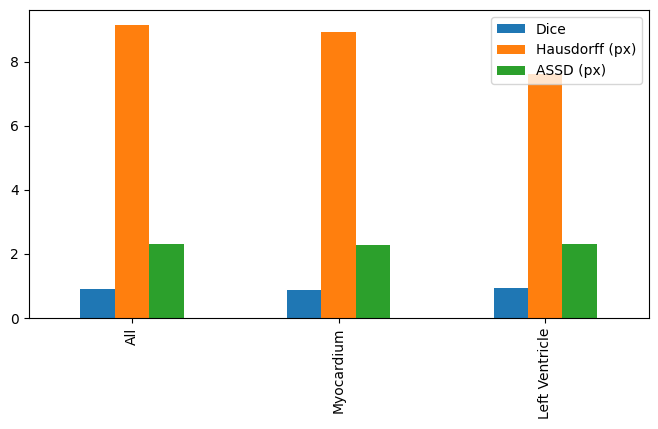

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 39.94it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.92,7.15,1.77
Myocardium,0.94,5.21,1.72
Left Ventricle,0.90,7.05,1.82


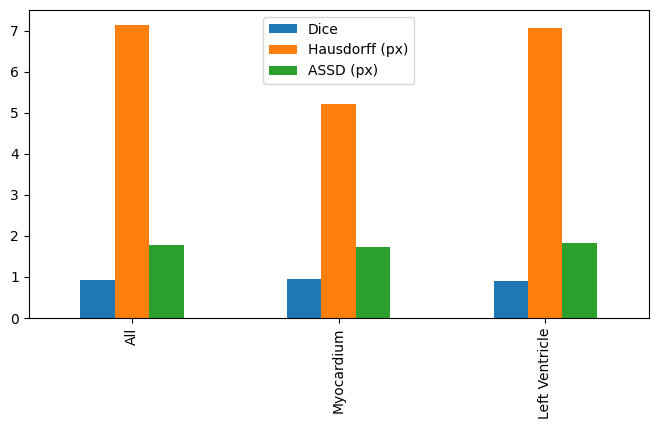

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 38.13it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,8.60,2.13
Myocardium,0.88,8.50,2.20
Left Ventricle,0.94,6.95,2.06


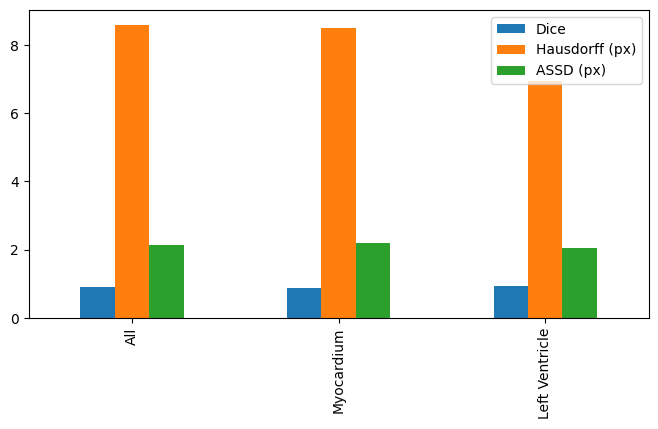

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 39.41it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.89,10.38,2.27
Myocardium,0.92,6.97,2.26
Left Ventricle,0.88,9.90,2.28


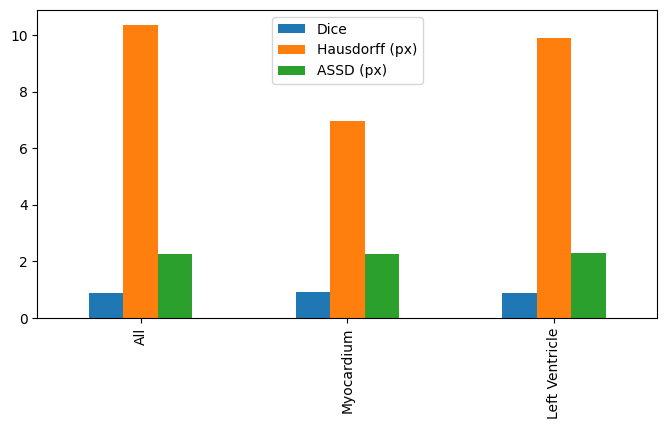

100/100 [==============================] - 1s 11ms/step


100%|██████████| 100/100 [00:02<00:00, 38.79it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,9.06,2.17
Myocardium,0.88,9.03,2.17
Left Ventricle,0.94,7.00,2.17


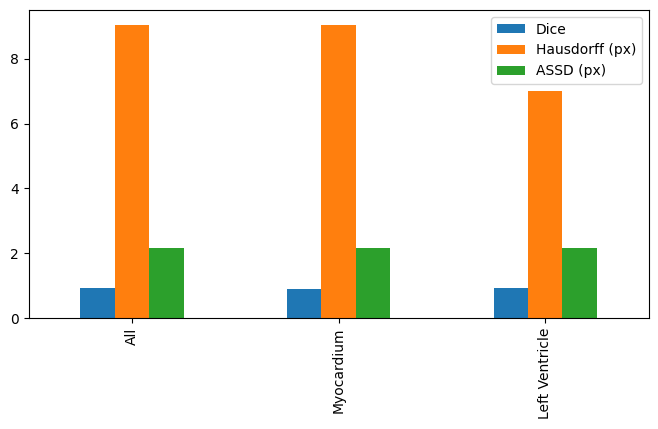

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 39.78it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,7.25,1.85
Myocardium,0.93,5.47,1.80
Left Ventricle,0.89,7.18,1.90


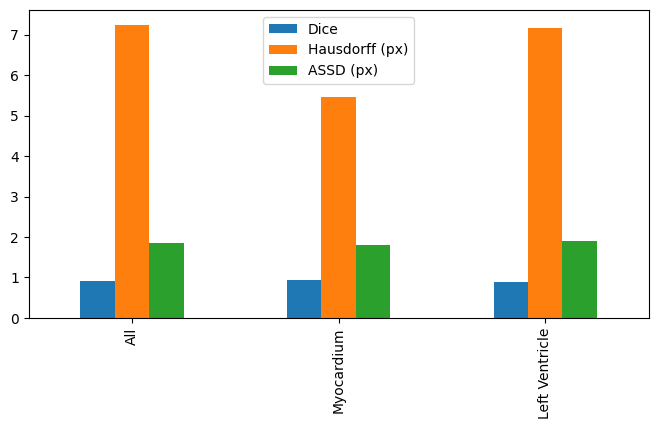

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 39.60it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,8.56,2.12
Myocardium,0.88,8.51,2.15
Left Ventricle,0.94,6.91,2.08


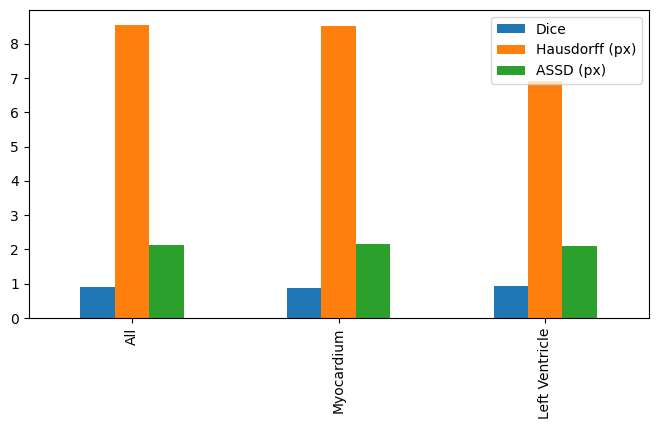

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 40.19it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,8.42,1.97
Myocardium,0.93,6.74,2.00
Left Ventricle,0.89,8.34,1.94


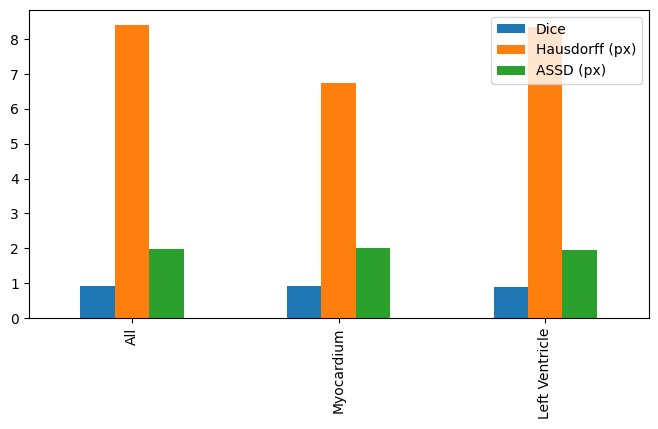

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 39.62it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,9.43,2.18
Myocardium,0.88,9.05,2.15
Left Ventricle,0.94,7.75,2.20


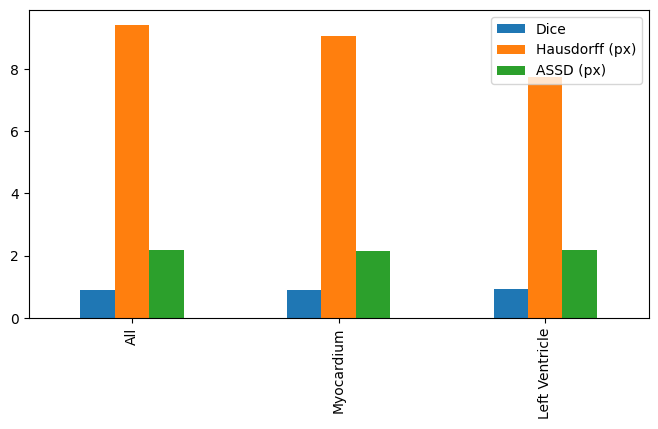

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 39.27it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.90,8.55,2.01
Myocardium,0.93,6.56,2.00
Left Ventricle,0.88,8.01,2.03


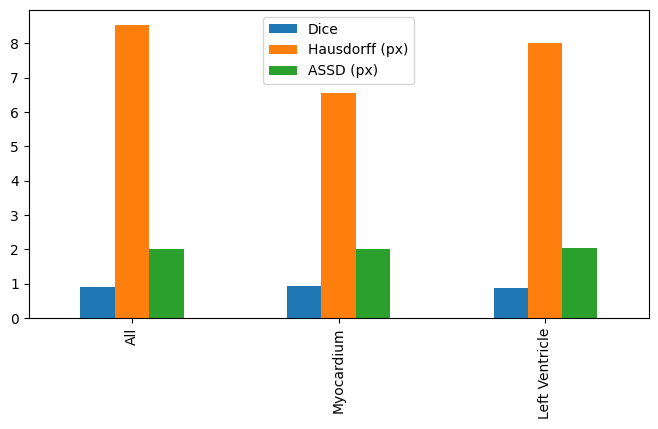

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 38.96it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,8.80,2.22
Myocardium,0.87,8.74,2.26
Left Ventricle,0.94,7.20,2.19


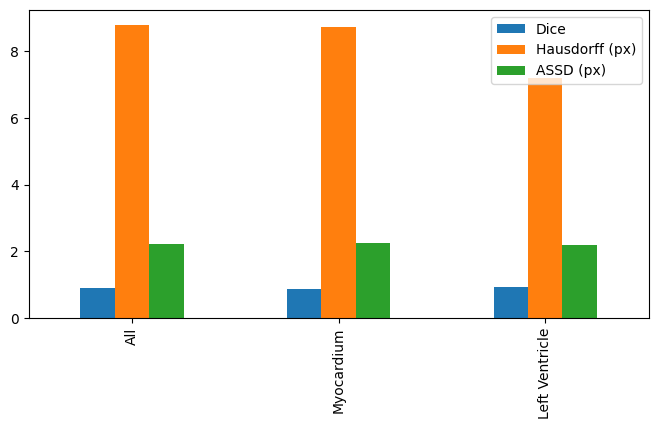

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 39.13it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.89,14.79,2.59
Myocardium,0.91,10.34,2.58
Left Ventricle,0.87,13.97,2.60


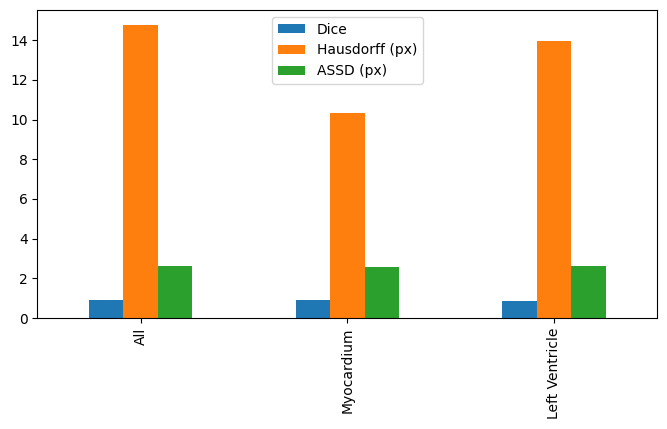

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 39.37it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,8.91,2.15
Myocardium,0.88,8.80,2.23
Left Ventricle,0.94,7.11,2.08


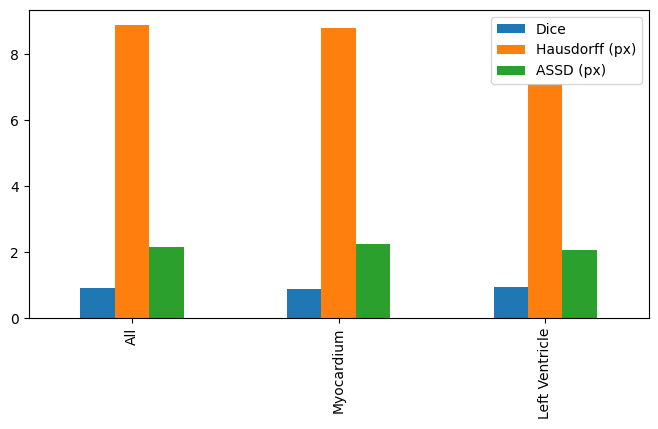

100/100 [==============================] - 1s 11ms/step


100%|██████████| 100/100 [00:02<00:00, 40.15it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.87,15.32,2.79
Myocardium,0.90,11.23,2.84
Left Ventricle,0.85,13.89,2.75


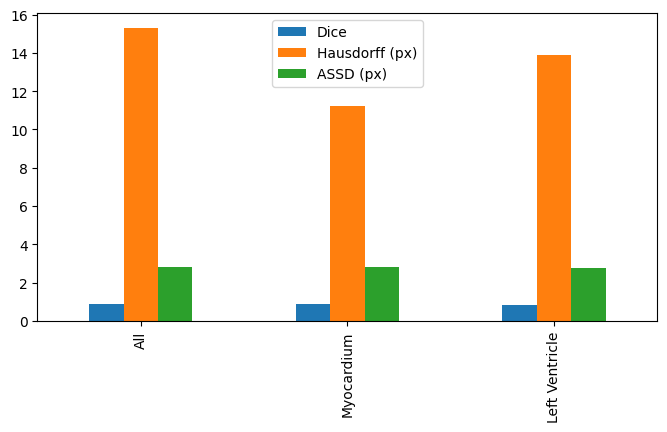

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 38.98it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,9.11,2.20
Myocardium,0.88,9.02,2.25
Left Ventricle,0.94,7.08,2.16


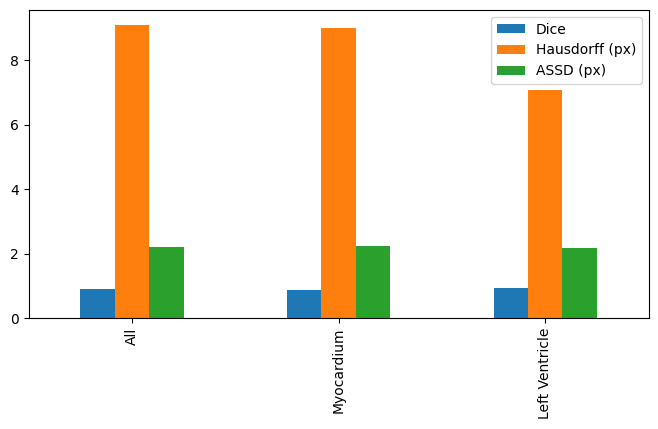

100/100 [==============================] - 2s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 40.14it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.86,17.46,3.02
Myocardium,0.88,11.87,3.03
Left Ventricle,0.84,16.53,3.02


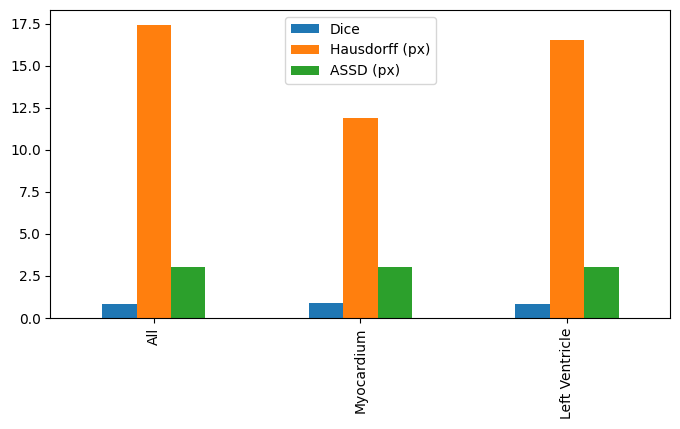

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 37.76it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,8.87,2.22
Myocardium,0.87,8.83,2.30
Left Ventricle,0.94,6.94,2.14


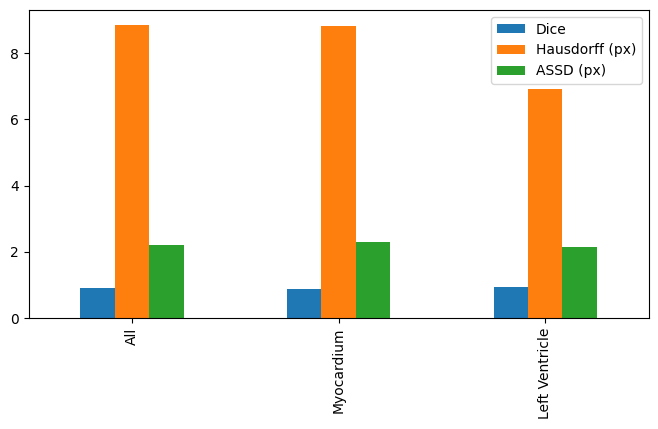

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 39.18it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.84,20.96,3.45
Myocardium,0.86,15.53,3.52
Left Ventricle,0.82,19.63,3.39


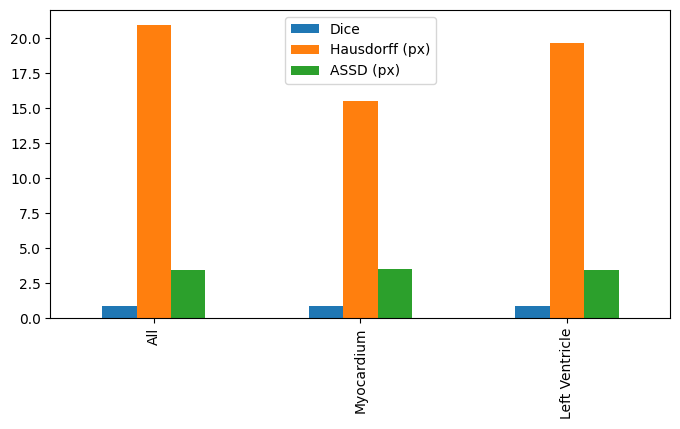

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 39.28it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,8.81,2.20
Myocardium,0.87,8.65,2.26
Left Ventricle,0.94,7.12,2.15


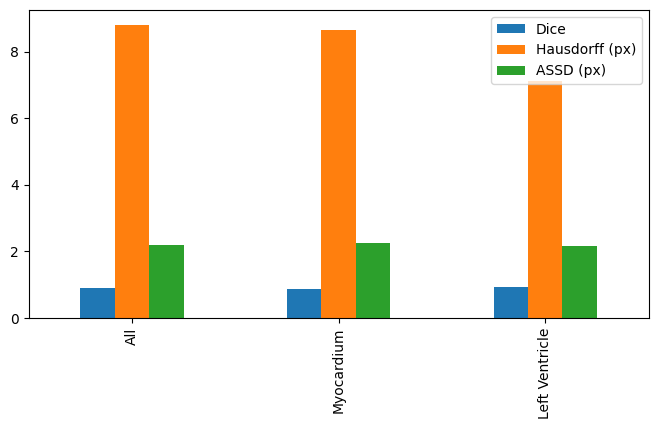

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 37.56it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.81,28.69,4.17
Myocardium,0.84,16.07,3.94
Left Ventricle,0.79,27.46,4.36


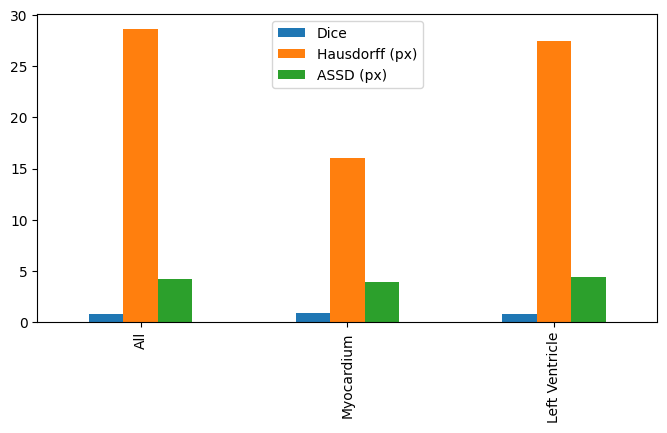

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 38.84it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,8.94,2.24
Myocardium,0.88,8.84,2.24
Left Ventricle,0.93,7.38,2.25


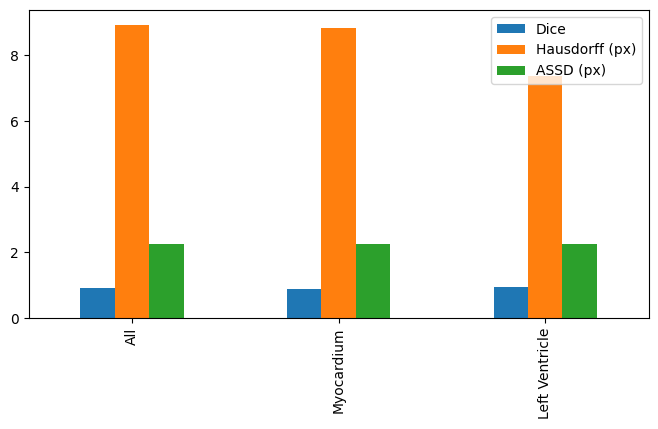

100/100 [==============================] - 1s 9ms/step


100%|██████████| 100/100 [00:02<00:00, 41.28it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.57,42.39,7.93
Myocardium,0.59,30.33,8.40
Left Ventricle,0.56,37.14,6.94


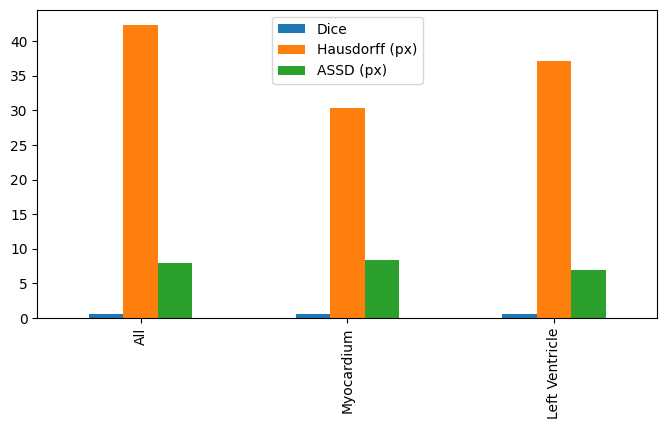

100/100 [==============================] - 1s 9ms/step


100%|██████████| 100/100 [00:02<00:00, 38.97it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.90,9.17,2.24
Myocardium,0.87,9.12,2.29
Left Ventricle,0.94,7.36,2.19


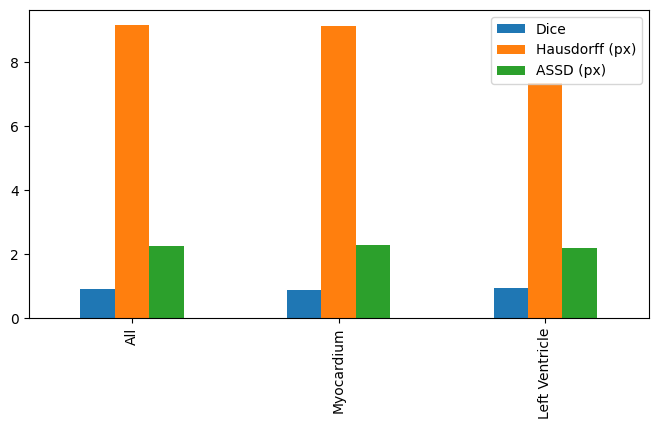

100/100 [==============================] - 1s 9ms/step


100%|██████████| 100/100 [00:02<00:00, 41.46it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.73,28.17,5.36
Myocardium,0.74,21.59,5.85
Left Ventricle,0.71,26.26,4.86


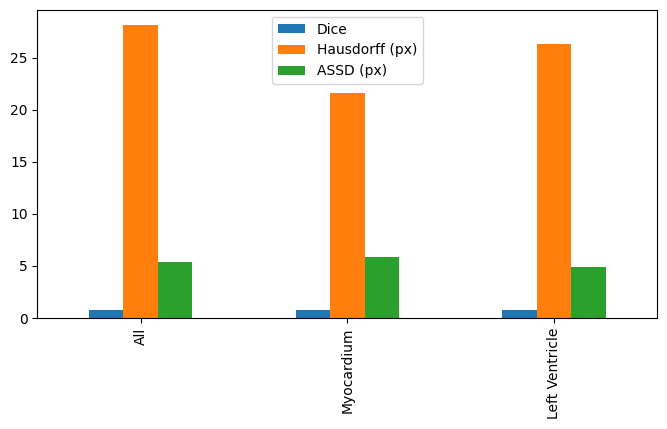

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 40.87it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,8.91,2.15
Myocardium,0.88,8.85,2.21
Left Ventricle,0.94,7.17,2.09


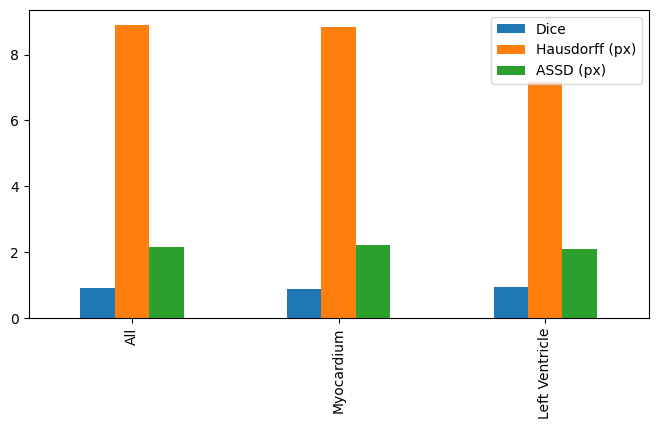

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 37.60it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.71,36.71,7.69
Myocardium,0.75,25.32,6.71
Left Ventricle,0.68,33.41,7.63


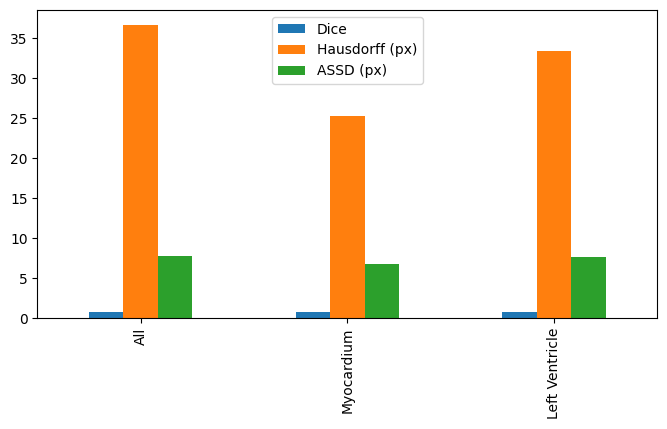

100/100 [==============================] - 1s 10ms/step


100%|██████████| 100/100 [00:02<00:00, 38.01it/s]


,Dice,Hausdorff (px),ASSD (px)
All,0.91,8.74,2.09
Myocardium,0.88,8.60,2.15
Left Ventricle,0.94,6.97,2.04


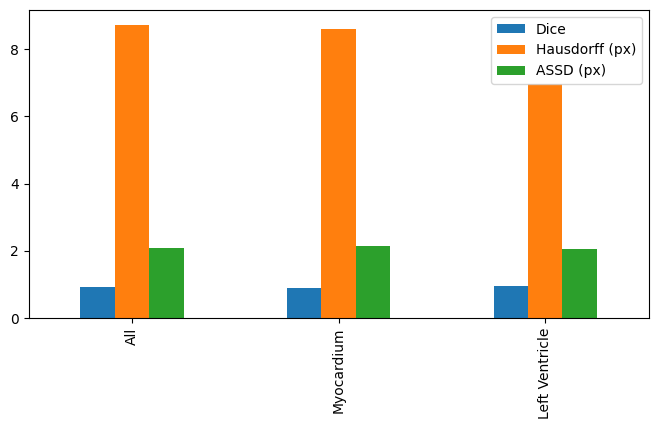

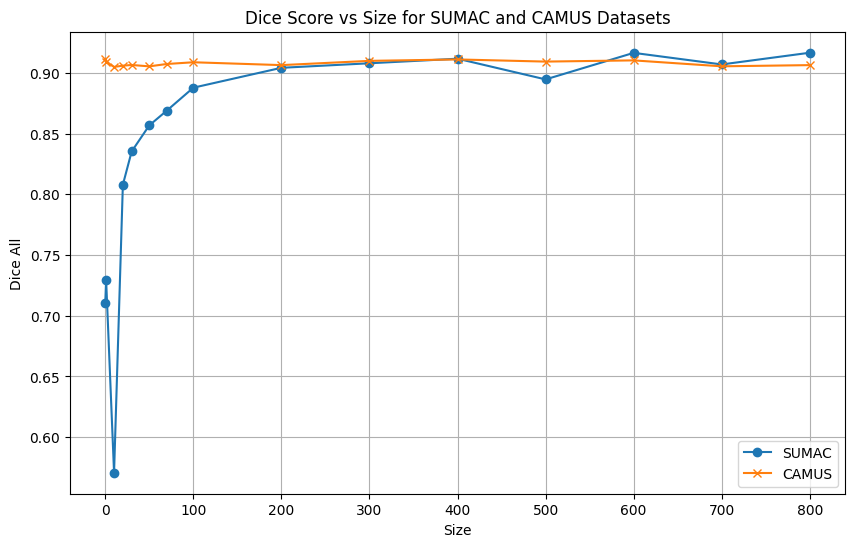

In [29]:
import matplotlib.pyplot as plt
sizes0 = [800, 700, 600, 500, 400, 300, 200, 100, 70, 50, 30, 20, 10, 1, 0]

def EvaluateSUAMC(X, y, model_path, size):
    model = models.load_model(model_path, custom_objects={'dice_coef': dice_coef, 'dice_loss': dice_loss})
    X_picked = X[:1000,]
    y_picked = y[:1000]

    y_pred = model.predict(X_picked, batch_size=1, verbose=1)
    if size in [1, 0]:
        y_pred[:, :, :, [1, 2]] = y_pred[:, :, :, [2, 1]]
    dice_all, hausdorff_all, assd_all, valid_all = evaluate_set(y[:1000, ], y_pred[:1000, ])

    overall_results = np.column_stack((dice_all, hausdorff_all, assd_all))
    overall_results_df = pd.DataFrame(data=overall_results, 
                                      index=["All", "Myocardium", "Left Ventricle"], 
                                      columns=["Dice", "Hausdorff (px)", "ASSD (px)"])

    title = f'SUMAC Dataset - Size {size}'
    display(HTML(f'<h3>{title}</h3>'))
    display(HTML(overall_results_df.to_html(float_format=lambda x: '%.2f' % x)))
    overall_results_df.plot(kind='bar', figsize=(8,4)).legend()
    plt.show()
    
    return dice_all[0]

def EvaluateCAMUS(X, y, model_path, size):
    model = models.load_model(model_path, custom_objects={'dice_coef': dice_coef, 'dice_loss': dice_loss})
    X_picked = X[:1000,]
    y_picked = y[:1000]

    y_pred = model.predict(X_picked, batch_size=1, verbose=1)
    dice_all, hausdorff_all, assd_all, valid_all = evaluate_set(y[:1000, ], y_pred[:1000, ])

    overall_results = np.column_stack((dice_all, hausdorff_all, assd_all))
    overall_results_df = pd.DataFrame(data=overall_results, 
                                      index=["All", "Myocardium", "Left Ventricle"], 
                                      columns=["Dice", "Hausdorff (px)", "ASSD (px)"])

    title = f'CAMUS Dataset - Size {size}'
    display(HTML(f'<h3>{title}</h3>'))
    display(HTML(overall_results_df.to_html(float_format=lambda x: '%.2f' % x)))
    overall_results_df.plot(kind='bar', figsize=(8,4)).legend()
    plt.show()
    
    return dice_all[0]

# Store results
dice_scores_S = []
dice_scores_C = []

# Evaluate and collect results
for size in sizes0:
    model_path = f'./trained_model/BestModelRandom/Unet_size{size}.h5'
    dice_scores_S.append(EvaluateSUAMC(X_test_S, y_test_S, model_path, size))
    dice_scores_C.append(EvaluateCAMUS(X_test_C, y_test_C, model_path, size))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sizes0, dice_scores_S, marker='o', label='SUMAC')
plt.plot(sizes0, dice_scores_C, marker='x', label='CAMUS')
plt.xlabel('Size')
plt.ylabel('Dice All')
plt.title('Dice Score vs Size for SUMAC and CAMUS Datasets')
plt.legend()
plt.grid(True)
plt.show()

